In [1]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

import sys
print(sys.version)

1.2.2
3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [2]:
import   pandas   as     pd
import   numpy    as     np
from     pprint   import pprint

### User defined functions

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh = 5):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    ncdf = X[cols[variables]]
    return ncdf

In [4]:
"""
   Function name: check_linearity()
        
    Description: This function checks whether continuous Independent Variable is linearly related to the log odds of the IV by plotting the IV in question and look for an S-shaped curve. 

    Input:
          1) Data Frame containing the independent variable
    
          2) Data frame containing the complete data
    
          3) Title for the graph
    
    Output:
          1) a  plot showing the linearity of the independent variable  

"""
def check_linearity(x1, df, title, y1):
    
    import matplotlib.pyplot as plt
    import seaborn           as sns
    
    sns.regplot(x = x1, y= y1, data= df, logistic= True).set_title(title)
    plt.show()

### ------------------------------------------------------------------

In [5]:
import  os

folder =  r'F:\DSE-Capstone\2023-Oct\DSE-FT-Pune-Aug23-G2\Data'

os.chdir(folder)

In [6]:
os.getcwd()

'F:\\DSE-Capstone\\2023-Oct\\DSE-FT-Pune-Aug23-G2\\Data'

In [7]:
filename = 'Cleaned_housing_loan_data.csv'

In [8]:
df_imp =  pd.read_csv(filename, encoding = 'Latin-1')
print("\nDimension {}".format(df_imp.shape))
print("\nColumns {}".format(df_imp.columns))


Dimension (307511, 16)

Columns Index(['AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'PA_AMT_CREDIT_sum',
       'PA_DAYS_DECISION_max_y', 'IP_DAYS_INSTALMENT_min',
       'IP_AMT_INSTALMENT_sum', 'IP_AMT_INSTALMENT_avg',
       'AT_CREDIT_INCOME_PERCENT', 'AT_ANNUITY_INCOME_PERCENT',
       'AT_CREDIT_TERM', 'AT_DAYS_EMPLOYED_PERCENT', 'TARGET'],
      dtype='object')


In [9]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   AMT_ANNUITY                307511 non-null  float64
 1   DAYS_BIRTH                 307511 non-null  int64  
 2   DAYS_REGISTRATION          307511 non-null  float64
 3   DAYS_ID_PUBLISH            307511 non-null  int64  
 4   EXT_SOURCE_2               307511 non-null  float64
 5   EXT_SOURCE_3               307511 non-null  float64
 6   PA_AMT_CREDIT_sum          307511 non-null  float64
 7   PA_DAYS_DECISION_max_y     307511 non-null  float64
 8   IP_DAYS_INSTALMENT_min     307511 non-null  float64
 9   IP_AMT_INSTALMENT_sum      307511 non-null  float64
 10  IP_AMT_INSTALMENT_avg      307511 non-null  float64
 11  AT_CREDIT_INCOME_PERCENT   307511 non-null  float64
 12  AT_ANNUITY_INCOME_PERCENT  307511 non-null  float64
 13  AT_CREDIT_TERM             30

In [12]:
X = df_imp.drop("TARGET",axis=1)
y = df_imp["TARGET"]

### Logistic Regression assumptions

1) Binary logistic regression requires the target / dependent variable to be binary. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome (such as Success etc..).
2) Only the meaningful variables should be included.
3) The predictor variables should not be correlated to each other meaning the model should have little or no multicollinearity.
4) The independent variables are linearly related to the log odds.
5) Logistic regression requires quite a large number of observations.

### Checking the assumptions

#### 1) Binary logistic regression requires the target / dependent variable to be binary.

For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome. In our case, we have only two levels or a binary class since the target variable is loan default or not, which denotes "Loan default" or "No Loan default". Hence this assumption is satisfied.

#### 2) Only the meaningful variables should be included.

It is ensured that there are no unwanted variables selected for model building.

#### 3) Absence of multicollinearity

**Multicollinearity** occurs when two or more predictor variables are highly correlated with each other, such that they do not provide unique or independent information in the regression model.

If the degree of correlation is high enough between predictor variables, it can cause problems when fitting and interpreting the regression model. 

The most straightforward way to detect multicollinearity in a regression model is by calculating a metric known as the variance inflation factor, often abbreviated VIF.

VIF measures the strength of correlation between predictor variables in a model. It takes on a value between 1 and positive infinity.

We use the following rules of thumb for interpreting VIF values:

* VIF = 1: There is no correlation between a given predictor variable and any other predictor variables in the model.
* VIF between 1 and 5: There is moderate correlation between a given predictor variable and other predictor variables in the model.
* VIF > 5: There is severe correlation between a given predictor variable and other predictor variables in the model.

Ref: https://www.statology.org/multicollinearity-in-python/

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [13]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))]

In [14]:
print(vif_data)

                      feature        VIF
0                 AMT_ANNUITY   7.840708
1                  DAYS_BIRTH  19.202635
2           DAYS_REGISTRATION   3.410588
3             DAYS_ID_PUBLISH   5.362726
4                EXT_SOURCE_2   8.265496
5                EXT_SOURCE_3  10.170373
6           PA_AMT_CREDIT_sum   5.386764
7      PA_DAYS_DECISION_max_y   2.676601
8      IP_DAYS_INSTALMENT_min   5.360309
9       IP_AMT_INSTALMENT_sum   6.572005
10      IP_AMT_INSTALMENT_avg   5.315728
11   AT_CREDIT_INCOME_PERCENT  26.990794
12  AT_ANNUITY_INCOME_PERCENT  32.497250
13             AT_CREDIT_TERM  16.051478
14   AT_DAYS_EMPLOYED_PERCENT   1.493588


In [18]:
print("\n\nVariables having VIF > threshold value of 5 ")
vif_data.loc[vif_data['VIF'] > 5, :]



Variables having VIF > threshold value of 5 


,feature,VIF
0,AMT_ANNUITY,7.840708
1,DAYS_BIRTH,19.202635
3,DAYS_ID_PUBLISH,5.362726
4,EXT_SOURCE_2,8.265496
5,EXT_SOURCE_3,10.170373
6,PA_AMT_CREDIT_sum,5.386764
8,IP_DAYS_INSTALMENT_min,5.360309
9,IP_AMT_INSTALMENT_sum,6.572005
10,IP_AMT_INSTALMENT_avg,5.315728
11,AT_CREDIT_INCOME_PERCENT,26.990794


In [19]:
X_noncollinear = calculate_vif_(X)

dropping 'AT_ANNUITY_INCOME_PERCENT' at index: 12
dropping 'DAYS_BIRTH' at index: 1
dropping 'EXT_SOURCE_3' at index: 4
dropping 'AMT_ANNUITY' at index: 0
dropping 'EXT_SOURCE_2' at index: 2
dropping 'IP_AMT_INSTALMENT_sum' at index: 5
Remaining variables:
Index(['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'PA_AMT_CREDIT_sum',
       'PA_DAYS_DECISION_max_y', 'IP_DAYS_INSTALMENT_min',
       'IP_AMT_INSTALMENT_avg', 'AT_CREDIT_INCOME_PERCENT', 'AT_CREDIT_TERM',
       'AT_DAYS_EMPLOYED_PERCENT'],
      dtype='object')


In [23]:
colsn  =   X_noncollinear.columns

In [24]:
X_ = X.loc[:, colsn]
X_.columns

Index(['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'PA_AMT_CREDIT_sum',
       'PA_DAYS_DECISION_max_y', 'IP_DAYS_INSTALMENT_min',
       'IP_AMT_INSTALMENT_avg', 'AT_CREDIT_INCOME_PERCENT', 'AT_CREDIT_TERM',
       'AT_DAYS_EMPLOYED_PERCENT'],
      dtype='object')

In [25]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X_.columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_.values, i) 
                          for i in range(len(X_.columns))] 
print(vif_data)

                    feature       VIF
0         DAYS_REGISTRATION  2.953766
1           DAYS_ID_PUBLISH  4.651346
2         PA_AMT_CREDIT_sum  3.470964
3    PA_DAYS_DECISION_max_y  2.644790
4    IP_DAYS_INSTALMENT_min  4.599634
5     IP_AMT_INSTALMENT_avg  4.154084
6  AT_CREDIT_INCOME_PERCENT  3.199292
7            AT_CREDIT_TERM  4.556879
8  AT_DAYS_EMPLOYED_PERCENT  1.226538


### Observation

There is no multi-collinearity as the VIF of each of the nine features is less than the threshold value of 5.

#### 4) The independent variables are linearly related to the log odds

We need to check the assumption of Independent variables are linearly related to the log odds.

One way to checking this is to plot the Independent variables in question and look for an S-shaped curve.

In [26]:
df2            =  X_noncollinear

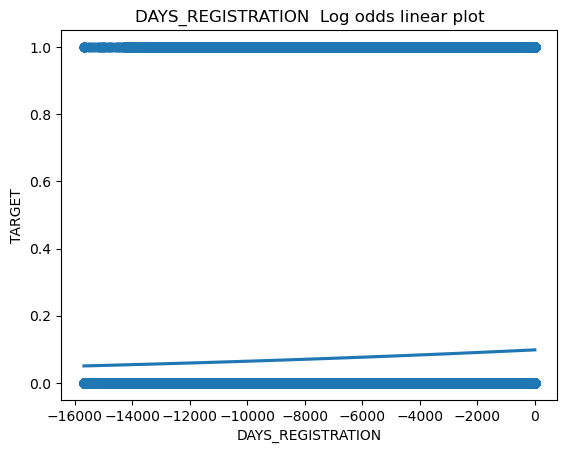

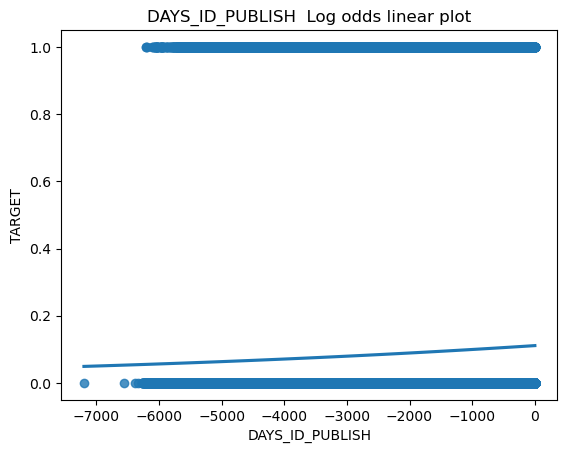

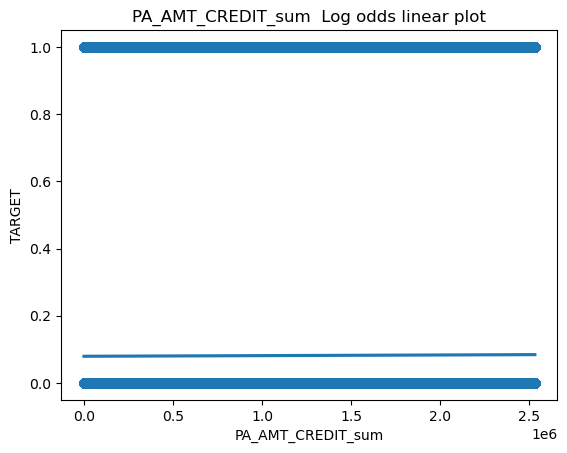

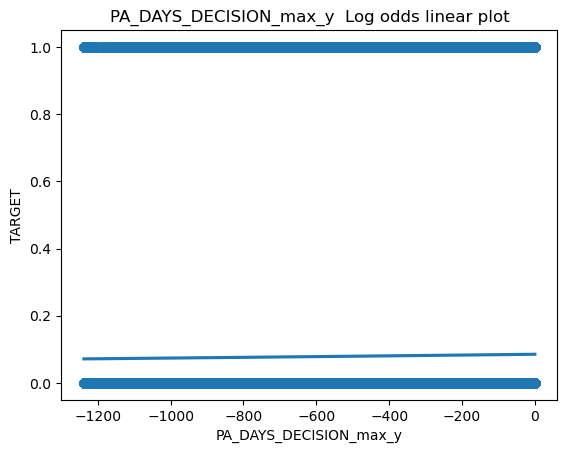

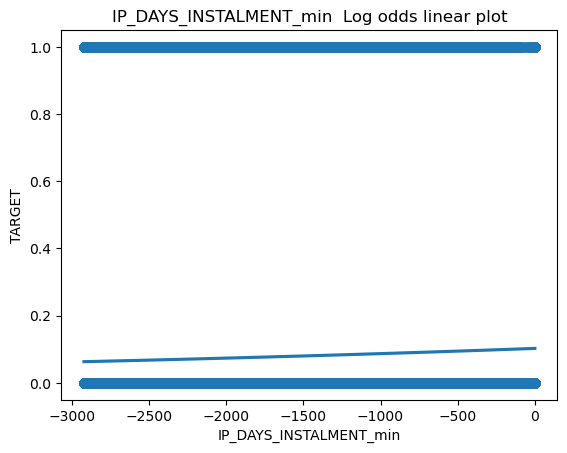

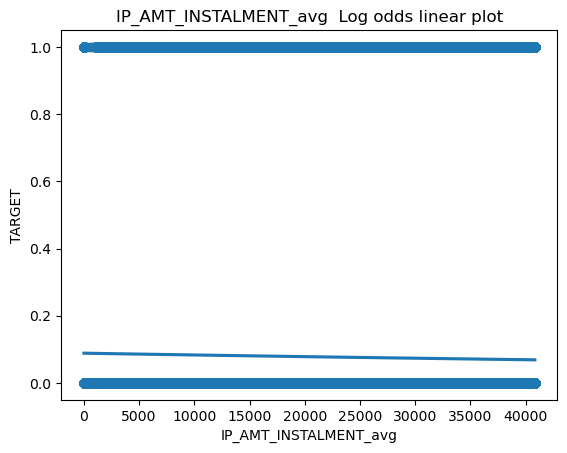

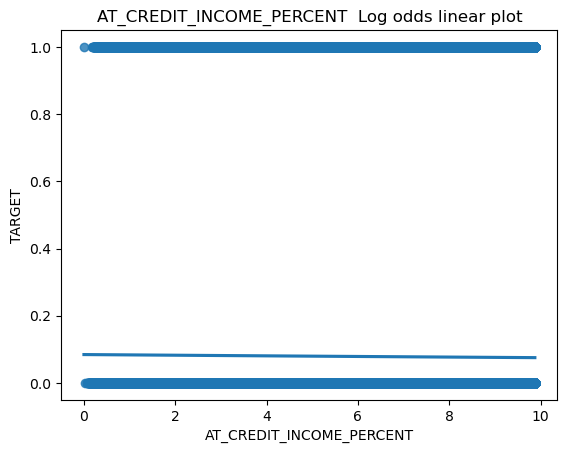

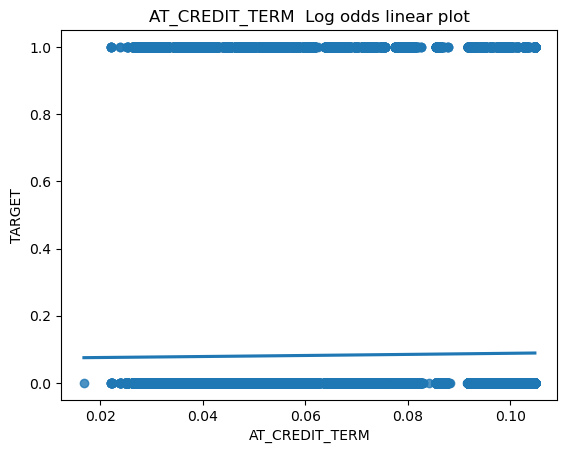

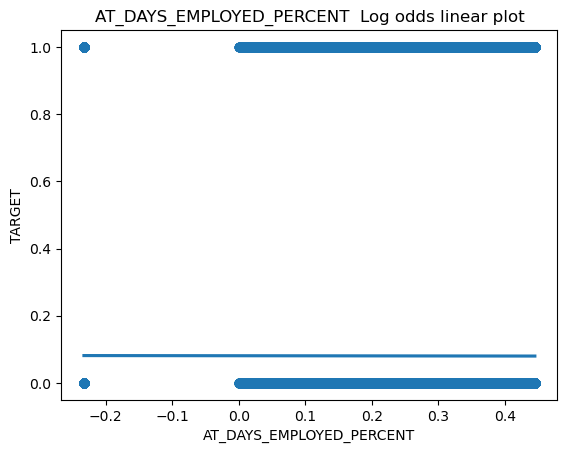

In [27]:
target    =  y
for i in range(len(colsn)):
    title = colsn[i] + '  Log odds linear plot'
    xvar  = colsn[i]
    check_linearity(xvar, df2, title, target)

### 5) Logistic regression requires quite a large number of observations.

A general rule of thumb is that at least 10 per variable.

We have 307511 observations and 9 variables; so we have approximately 34k observations per variable.

### Observations

Hence all the assumptions of the Logistic Regression are satisfied.

### END of Checking all assumptions of Logistic Regression